<a href="https://colab.research.google.com/github/Sairaj-97/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

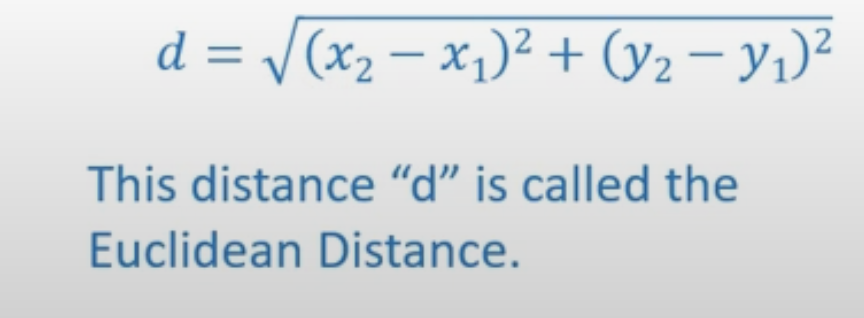

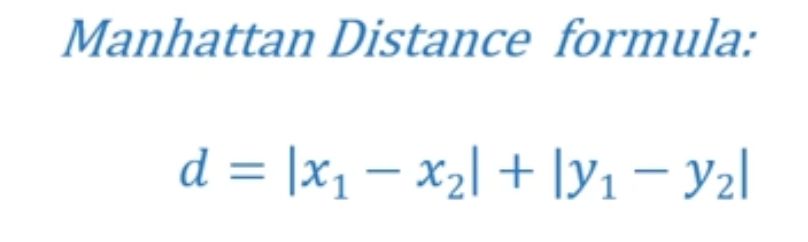

"Manhattan distance is preferred over Euclidean distance when there is high dimensionality in the data."

In [31]:
import numpy as np
import statistics

In [32]:
class KNN_Classifier():
  def __init__(self,distance_metric):
    self.distance_metric = distance_metric

  def get_distance(self,training_data_point,test_data_point):
    if self.distance_metric == 'manhattan':
      distance = 0
      for i in range(len(training_data_point)-1):
        distance += abs(training_data_point[i] - test_data_point[i])
      return distance

    elif self.distance_metric == 'euclidean':
      distance = 0
      for i in range(len(training_data_point)-1):
        distance += (training_data_point[i] - test_data_point[i])**2
      return np.sqrt(distance)

  def get_neighbours(self,X_train,test_data_point,k):
    distance=[]
    for training_data_point in X_train:
      d=self.get_distance(training_data_point,test_data_point)
      distance.append((training_data_point,d))
    distance.sort(key=lambda x:x[1])

    neighbours=[]

    for i in range(k):
      #this appends the closest k data points(whole row)
      neighbours.append(distance[i][0])
    return neighbours

  def predict(self,X_train,test_data_point,k):
    neighbours=self.get_neighbours(X_train,test_data_point,k)
    data=[]

    for i in range(len(neighbours)):
      data.append(neighbours[i][-1])

    predicted_class = statistics.mode(data)

    return predicted_class


Implemeting the class

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [35]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# separating features and Target
X = diabetes_dataset.drop(columns='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [37]:
# converting the data to numpy array
X = X.to_numpy()
Y = Y.to_numpy()

In [38]:
# train test split
#stratify=Y means class distribution in our training and test sets is the same as in the original dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [39]:
X_train = np.insert(X_train, 8, Y_train, axis=1)

X_train --> training data with features and target

X_test  --> test data without target

Model Training : KNN Classifier

In [40]:
classifier = KNN_Classifier(distance_metric='manhattan')

NOTE: The KNN CLassifier can predict the label for only one data point at a time

In [41]:
prediction = classifier.predict(X_train, X_test[2], k=5)

In [42]:
print(X_test[2])

[  5.    147.     78.      0.      0.     33.7     0.218  65.   ]


In [43]:
print(Y_test[2])

0


In [44]:
print(prediction)

0.0


In [45]:
X_test.shape

(154, 8)

In [46]:
X_test_size = X_test.shape[0]
print(X_test_size)

154


In [47]:
y_pred = []

for i in range(X_test_size):
  prediction = classifier.predict(X_train, X_test[i], k=5)
  y_pred.append(prediction)

In [48]:
print(y_pred)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.

In [49]:
y_true = Y_test

Model Evaluation

In [50]:
accuracy = accuracy_score(y_true, y_pred)

In [51]:
print(accuracy*100)  # accuracy score in %

77.92207792207793
